In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [4]:
#What are the top 5 zipcodes for 911 calls?

df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
#What are the top 5 townships (twp) for 911 calls?

df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [6]:
#creting new features
df['reason'] = df['title'].apply(lambda str : str.split(':')[0])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


In [7]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

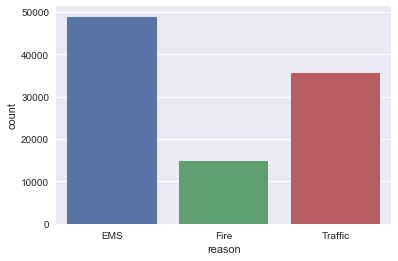

In [8]:
sns.countplot(x='reason', data = df)

In [9]:
#What is the data type of the objects in the timeStamp column?
type(df['timeStamp'].iloc[0])

str

In [10]:
#converting the column from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [11]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [12]:
#creating 3 new columns called Hour, Month, and Day of Week, based off of the timeStamp column
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['month'] = df['timeStamp'].apply(lambda time:time.month)
df['day'] = df['timeStamp'].apply(lambda day : day.dayofweek)

In [13]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


In [14]:
# converting of numbers by its weekday name in the day column
dmap = {0:'Mon',1:'Tues',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day'] = df['day'].map(dmap)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


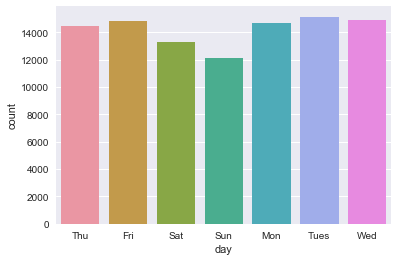

In [15]:
sns.countplot(x='day',data=df)

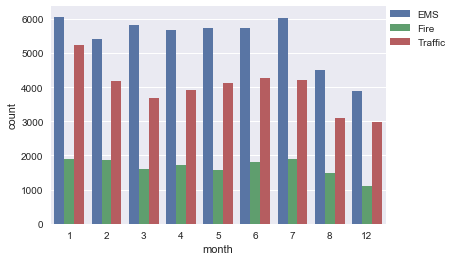

In [16]:
sns.countplot(x='month',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [17]:
# Missing some Months in the above plot ,filling that information by plotting the information in another way.
bymonth = df.groupby('month').count()
bymonth.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467


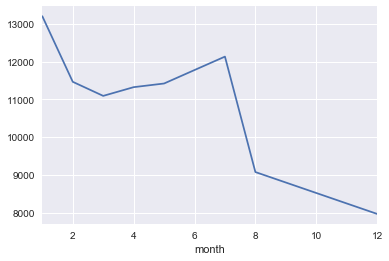

In [18]:
bymonth['twp'].plot()

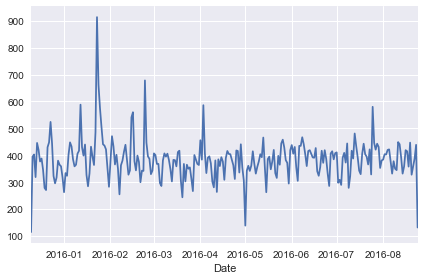

In [19]:
#Create a new column called 'Date' that contains the date from the timeStamp column

df['Date'] = df['timeStamp'].apply(lambda t:t.date())
bydate = df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

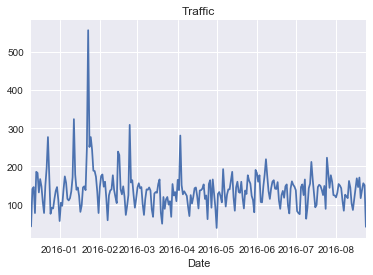

In [20]:
#creating 3 separate plots with each plot representing a Reason for the 911 call
df[df['reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

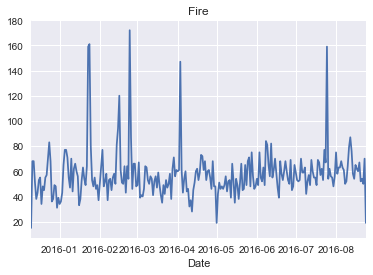

In [21]:
df[df['reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

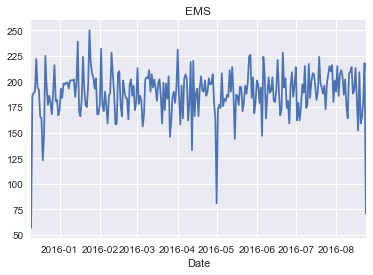

In [22]:
df[df['reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

In [23]:
# creating heatmaps with seaborn by restructure the dataframe so that the columns become the Hours and 
# index becomes the Day of the Week

dayhour = df.groupby(by=('day','hour')).count()['reason'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


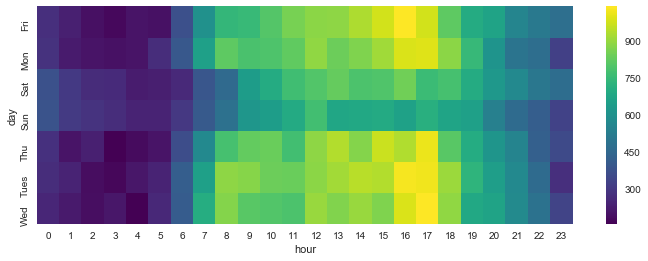

In [24]:
plt.figure(figsize=(12,4))
sns.heatmap(dayhour,cmap='viridis')